# Sujet 2 : le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

## Importation des données

Les données utilisées dans le cadre de cette étude proviennent des travaux de [William Playfair](https://fr.wikipedia.org/wiki/William_Playfair). Plus précisément, elles sont tirées de son livre "[A Letter on Our Agricultural Distresses, Their Causes and Remedies](https://books.google.fr/books/about/A_Letter_on_Our_Agricultural_Distresses.html?id=aQZGAQAAMAAJ)" dans lequel peut être trouvé un de ses [graphes](https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png) célèbres, présentant l'évolution du prix du blé et du salaire moyen entre 1565 et 1821.

Par la [numérisation](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Wheat.html) de ce graphe, des valeurs ont pu être obtenues au sein d'un [fichier au format CSV](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv). C'est à partir de ce fichier que l'ensemble des calculs présentés ici ont été réalisés.

In [1]:
data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"

Dans un premier temps, on introduit l'ensemble des bibliothèques qui nous serviront pour le code lié aux calculs :

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Les données présentes dans le fichier au format CSV sont les suivantes :

In [3]:
raw_data = pd.read_csv(data_url,header=0)
raw_data

Unnamed: 0  Year  Wheat  Wages
0            1  1565   41.0   5.00
1            2  1570   45.0   5.05
2            3  1575   42.0   5.08
3            4  1580   49.0   5.12
4            5  1585   41.5   5.15
5            6  1590   47.0   5.25
6            7  1595   64.0   5.54
7            8  1600   27.0   5.61
8            9  1605   33.0   5.69
9           10  1610   32.0   5.78
10          11  1615   33.0   5.94
11          12  1620   35.0   6.01
12          13  1625   33.0   6.12
13          14  1630   45.0   6.22
14          15  1635   33.0   6.30
15          16  1640   39.0   6.37
16          17  1645   53.0   6.45
17          18  1650   42.0   6.50
18          19  1655   40.5   6.60
19          20  1660   46.5   6.75
20          21  1665   32.0   6.80
21          22  1670   37.0   6.90
22          23  1675   43.0   7.00
23          24  1680   35.0   7.30
24          25  1685   27.0   7.60
25          26  1690   40.0   8.00
26          27  1695   50.0   8.50
27          28  1700   30.0   9.00
28          29  1705   32.0  10.00
29          30  1710   44.0  11.00
30          31  1715   33.0  11.75
31          32  1720   29.0  12.50
32          33  1725   39.0  13.00
33          34  1730   26.0  13.30
34          35  1735   32.0  13.60
35          36  1740   27.0  14.00
36          37  1745   27.5  14.50
37          38  1750   31.0  15.00
38          39  1755   35.5  15.70
39          40  1760   31.0  16.50
40          41  1765   43.0  17.60
41          42  1770   47.0  18.50
42          43  1775   44.0  19.50
43          44  1780   46.0  21.00
44          45  1785   42.0  23.00
45          46  1790   47.5  25.50
46          47  1795   76.0  27.50
47          48  1800   79.0  28.50
48          49  1805   81.0  29.50
49          50  1810   99.0  30.00
50          51  1815   78.0    NaN
51          52  1820   54.0    NaN
52          53  1821   54.0    NaN

## Reproduction du graphe de Playfair

Au sein de cette partie, on tente de reproduire le graphique initial de Playfair. Il s'agit dans un premier temps d'extraire les données du tableau ci-dessus. Les données sont stockées dans les variables X,Y1 et Y2 qui vont par la suite nous permettre de tracer les graphiques souhaités.

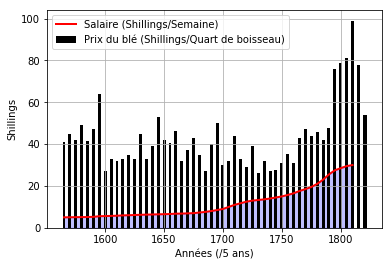

In [4]:
X=raw_data['Year'] #Contient les années
Y1=raw_data['Wages'] #Contient le salaire correspondant à chaque année
Y2=raw_data['Wheat'] #Contient le prix du blé correspondant à chaque année

plt.grid(True)
plt.plot(X, Y1,"r",label='Salaire (Shillings/Semaine)',linewidth=2)
plt.bar(X,Y2,label='Prix du blé (Shillings/Quart de boisseau)',color='black',width=2.5)
plt.fill_between(X,Y1,color='blue',alpha=0.25)

plt.xlabel('Années (/5 ans)')
plt.ylabel('Shillings')
plt.legend()

# Amélioration de la présentation des données

Il s'agit désormais de modifier le graphique précédent afin d'obtenir une représentation plus pertinente des données.

On va procéder différemment du paragraphe précédent en créant axes et courbes étape par étape. À l'inverse du paragraphe précédent où l'on a créé la courbe avant de définir les axes des abscisses et ordonnées, on créé et on défini ici d'abord les axes puis l'on trace les courbes correspondant à ces axes : 

<BarContainer object of 53 artists>

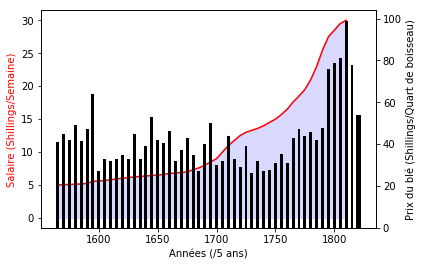

In [5]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Années (/5 ans)')
ax1.set_ylabel('Salaire (Shillings/Semaine)',color='red')
ax1.plot(X, Y1, "r")
ax1.fill_between(X, Y1, color='blue',alpha=0.15)

ax2=ax1.twinx()
ax2.set_ylabel('Prix du blé (Shillings/Quart de boisseau)',color='black')
ax2.bar(X, Y2, color='black',width=2.5)

Utiliser deux courbes serait cependant peut être plus lisible, il suffit alors de remplacer simplement le type de graphique pour ax2 ("bar" devient "plot") :

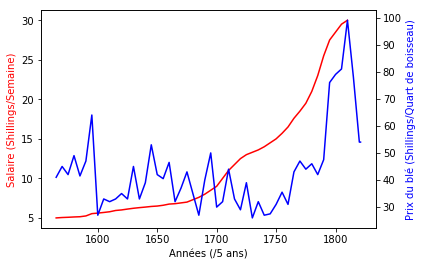

In [6]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Années (/5 ans)')
ax1.set_ylabel('Salaire (Shillings/Semaine)',color='red')
ax1.plot(X, Y1, "r")

ax2=ax1.twinx()
ax2.set_ylabel('Prix du blé (Shillings/Quart de boisseau)',color='blue')
ax2.plot(X, Y2, "b")

# Étude du pouvoir d'achat des ouvriers

Dans cette dernière partie, on utilise les données pour déterminer de quelle manière à évoluer le pouvoir d'achat des ouvriers au cours du temps.

Dans un premier temps, afin de rendre les données plus actuelles, on va ramener le prix du blé au kilogramme. Un quart de boisseau de blé étant équivalent à 6,8 kg de blé, on divise le prix d'un quart de boisseau de blé par 6,8 pour obtenir le prix au kilo (arrondi à deux décimales près). Pour cela on introduit une variable "PK" tel que :

In [7]:
PK = round(Y2/6.8,2)
print(PK)

0      6.03
1      6.62
2      6.18
3      7.21
4      6.10
5      6.91
6      9.41
7      3.97
8      4.85
9      4.71
10     4.85
11     5.15
12     4.85
13     6.62
14     4.85
15     5.74
16     7.79
17     6.18
18     5.96
19     6.84
20     4.71
21     5.44
22     6.32
23     5.15
24     3.97
25     5.88
26     7.35
27     4.41
28     4.71
29     6.47
30     4.85
31     4.26
32     5.74
33     3.82
34     4.71
35     3.97
36     4.04
37     4.56
38     5.22
39     4.56
40     6.32
41     6.91
42     6.47
43     6.76
44     6.18
45     6.99
46    11.18
47    11.62
48    11.91
49    14.56
50    11.47
51     7.94
52     7.94
Name: Wheat, dtype: float64


Le pouvoir d'achat d'un ouvrier se définit par la quantité de blé qu'il peut acheter avec son salaire par semaine (en kg, arrondi à deux décimales près). On définit donc la variable pouvoir d'achat "PA" tel que :

In [8]:
PA = round(Y1/PK,2)
print(PA)

0     0.83
1     0.76
2     0.82
3     0.71
4     0.84
5     0.76
6     0.59
7     1.41
8     1.17
9     1.23
10    1.22
11    1.17
12    1.26
13    0.94
14    1.30
15    1.11
16    0.83
17    1.05
18    1.11
19    0.99
20    1.44
21    1.27
22    1.11
23    1.42
24    1.91
25    1.36
26    1.16
27    2.04
28    2.12
29    1.70
30    2.42
31    2.93
32    2.26
33    3.48
34    2.89
35    3.53
36    3.59
37    3.29
38    3.01
39    3.62
40    2.78
41    2.68
42    3.01
43    3.11
44    3.72
45    3.65
46    2.46
47    2.45
48    2.48
49    2.06
50     NaN
51     NaN
52     NaN
dtype: float64


Il ne reste plus qu'à tracer l'évolution de ce pouvoir d'achat au cours du temps :

Text(0,0.5,"Pouvoir d'achat (kg de blé)")

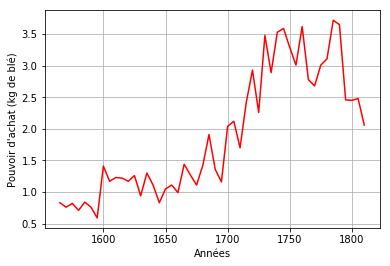

In [9]:
plt.grid(True)
plt.plot(X, PA, "r")
plt.xlabel('Années')
plt.ylabel('Pouvoir d\'achat (kg de blé)')

Il peut être remarqué que le pouvoir d'achat a globalement augmenté, un ouvrier pouvant acheter un peu plus d'1 kg de blé avec son salaire hébdomadaire au début du 17ème siècle contre plus de 3 kg au milieu du 18ème siècle. Cependant le pouvoir d'achat semble avoir commencé à diminuer à partir de la fin du 18ème siècle.

Enfin, pour la dernière partie de cette étude, on va tenter de représenter autrement les données, au travers d'un graphique sur lequel n'est pas représenté l'axe du temps.

On a fait le choix de représenter un nuage de point avec en abscisse les salaires hebdomadaires des ouvriers et en ordonnée le prix du blé au kilogramme. Ainsi, des points situés en haut à gauche du graphique seront synonymes d'un pouvoir d'achat élevé, tandis que des points situés en bas à droite, un pouvoir d'achat faible.

Trois droites représentant respectivement des Pouvoir d'achat de 1, 2 et 3 kg de blé sont également tracées. Elles permettent de mieux observer l'évolution du pouvoir d'achat pour les ouvriers au cours du temps. 

Les points sont colorés de telle sorte que chaque couleur correspond à une période d'un demi siècle.

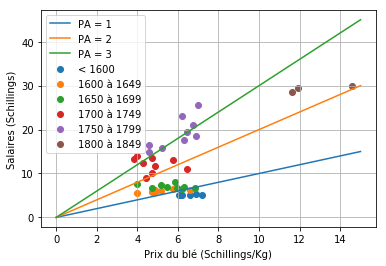

In [32]:
plt.grid(True)
plt.scatter(PK[0:6],raw_data['Wages'][0:6],label='< 1600')
plt.scatter(PK[7:16],raw_data['Wages'][7:16],label='1600 à 1649')
plt.scatter(PK[17:26],raw_data['Wages'][17:26],label='1650 à 1699')
plt.scatter(PK[27:36],raw_data['Wages'][27:36],label='1700 à 1749')
plt.scatter(PK[37:46],raw_data['Wages'][37:46],label='1750 à 1799')
plt.scatter(PK[47:52],raw_data['Wages'][47:52],label='1800 à 1849')

plt.plot([0,15],[0,15],label='PA = 1')
plt.plot([0,15],[0,30],label='PA = 2')
plt.plot([0,15],[0,45],label='PA = 3')

plt.xlabel('Prix du blé (Schillings/Kg)')
plt.ylabel('Salaires (Schillings)')
plt.legend()